# Gradients

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('../DATA/sudoku.jpg', 0)

In [14]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

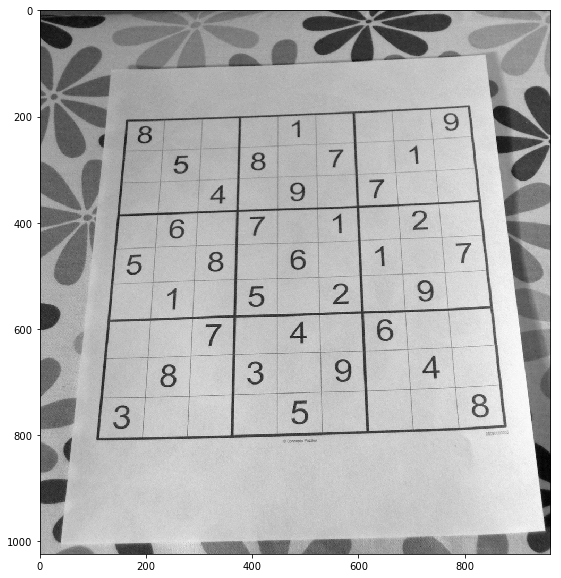

In [15]:
display_img(img)

In [27]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

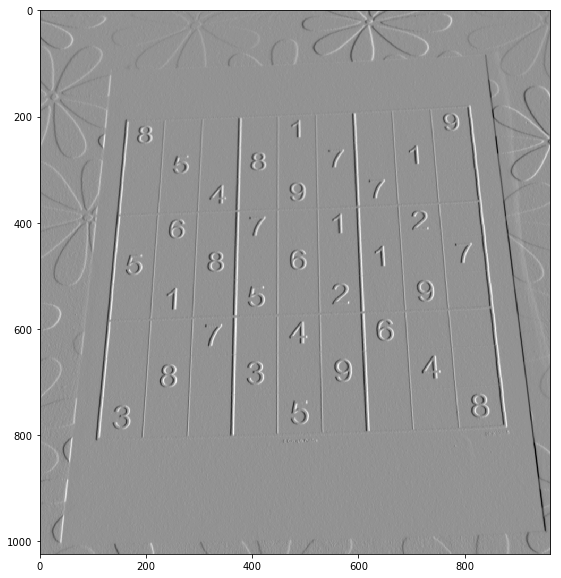

In [16]:
display_img(sobelx)

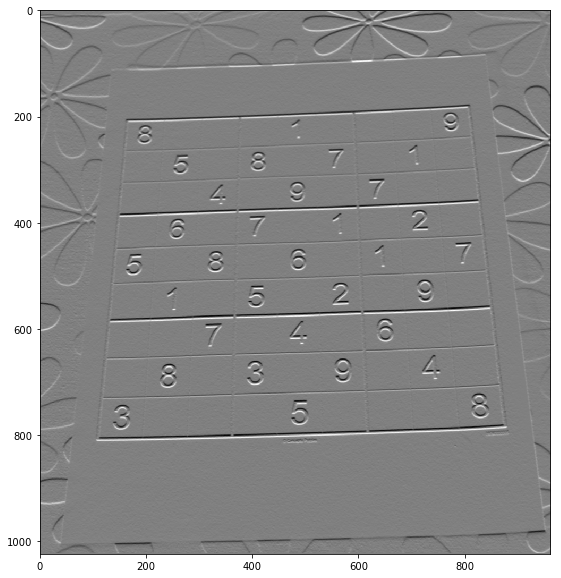

In [17]:
display_img(sobely)

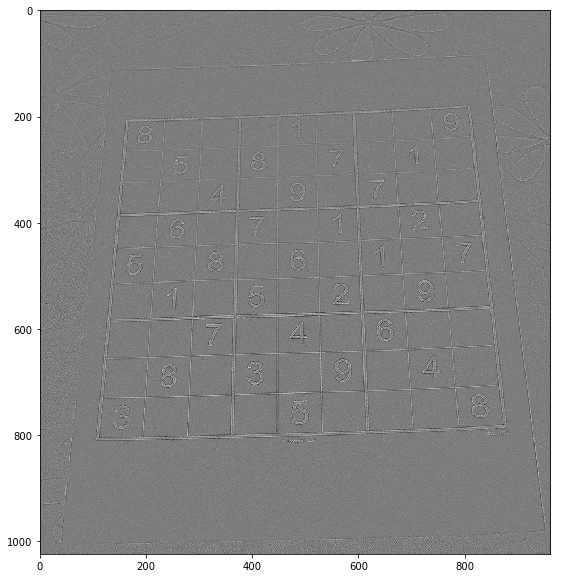

In [18]:
display_img(laplcian)

# Combining Previous Ideas

# Blending Images

In [22]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)

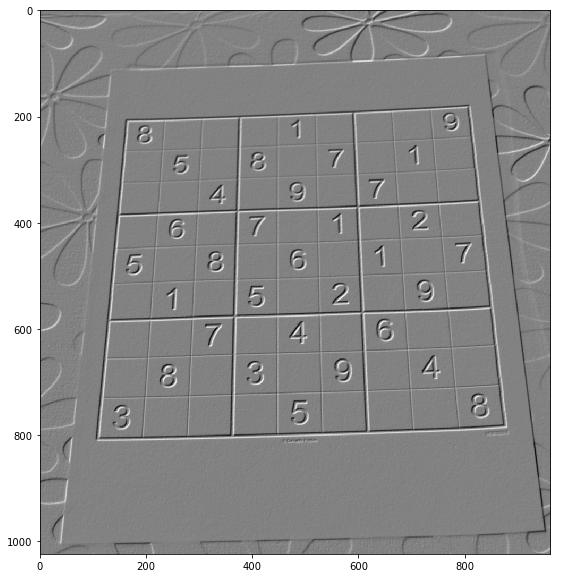

In [23]:
display_img(blended)

In [24]:
blended.shape

(1024, 962)

# Morphological Operators

In [25]:
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)


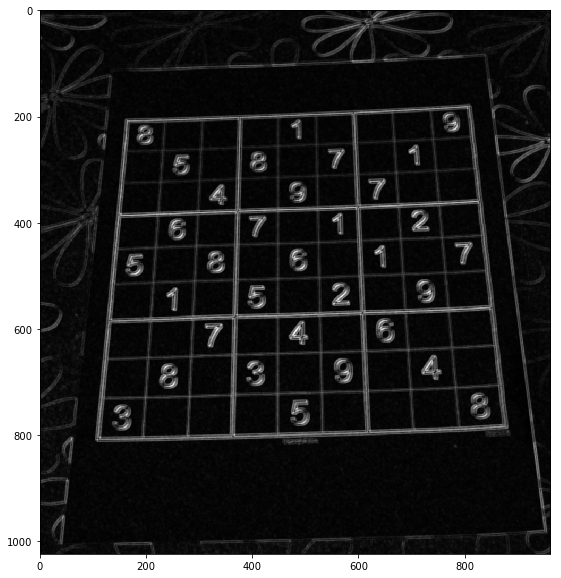

In [26]:
display_img(gradient)

Lets use laplacian result!

In [28]:
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(laplacian,cv2.MORPH_GRADIENT,kernel)

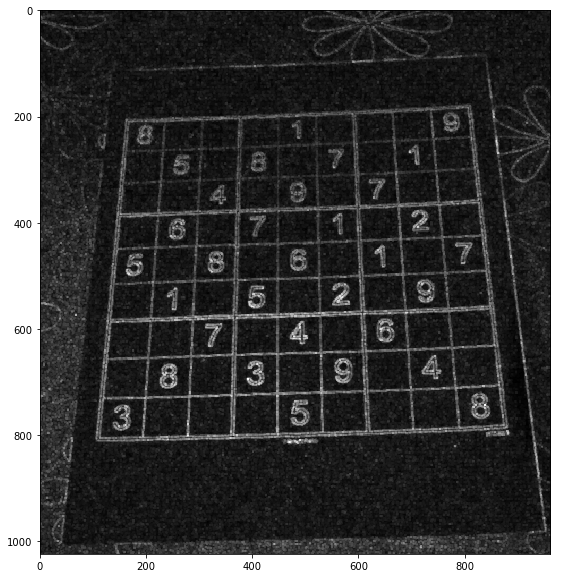

In [30]:
display_img(gradient)

# Thresholds

In [33]:
img.max()

245

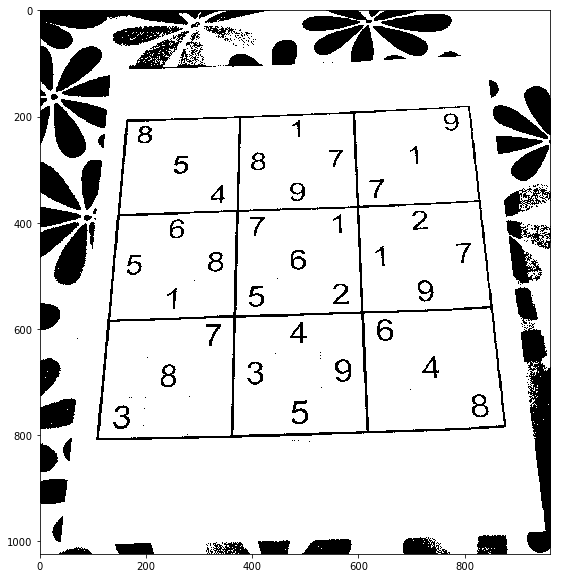

In [41]:
ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
display_img(th1)

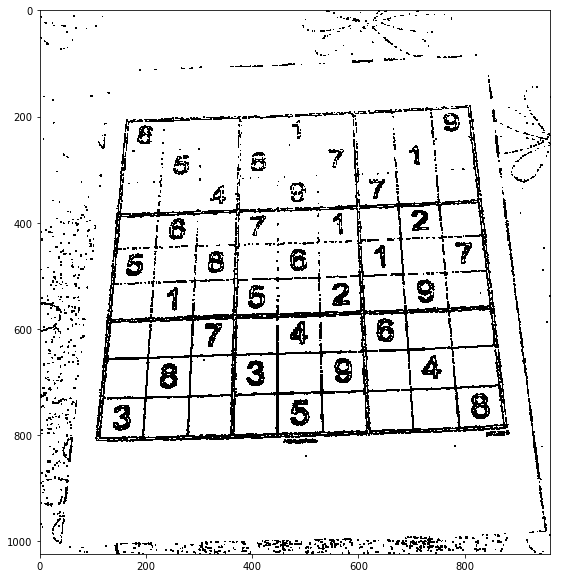

In [46]:
ret, th2 = cv2.threshold(gradient,100,255,cv2.THRESH_BINARY_INV)
display_img(th2)

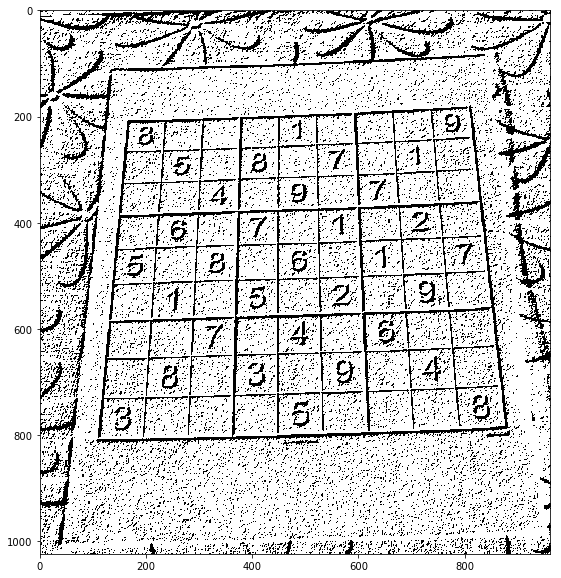

In [47]:
ret, th3 = cv2.threshold(blended,100,255,cv2.THRESH_BINARY_INV)
display_img(th3)